## Describing EMS & Fire Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
ems_example_df = pd.read_csv(os.getenv('EMS_DATA_EXAMPLE_PATH'))
fire_example_df = pd.read_csv(os.getenv('FIRE_DATA_EXAMPLE_PATH'))


print("EMS DataFrame Info:")
print(ems_example_df.info())
print(ems_example_df.describe)

print("\nFire DataFrame Info:")
print(fire_example_df.info())
print(fire_example_df.describe)

EMS DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 11 columns):
 #   Column                                                                         Non-Null Count  Dtype 
---  ------                                                                         --------------  ----- 
 0   Response Incident Number (eResponse.03)                                        2369 non-null   int64 
 1   Response EMS Response Number (eResponse.04)                                    2365 non-null   object
 2   Response EMS Unit Call Sign (eResponse.14)                                     2369 non-null   object
 3   Response EMS Vehicle Unit Number (eResponse.13)                                2369 non-null   object
 4   Response Level Of Care Of This Unit (3.4=eResponse.15/3.5=itResponse.115)      2313 non-null   object
 5   Incident Unit Left Scene Date Time (eTimes.09)                                 1378 non-null   object
 6   Incident Uni

#### Average Response Time

Top 5 Incident Types:
Basic Incident Type (FD1.21)
Outside equipment fire                              21.566667
Search for person on land                           15.296726
Brush or brush-and-grass mixture fire (Wildland)    13.733333
Carbon monoxide incident                            13.179365
Sprinkler activation, no fire - unintentional       12.191667
Name: resp_mins, dtype: float64


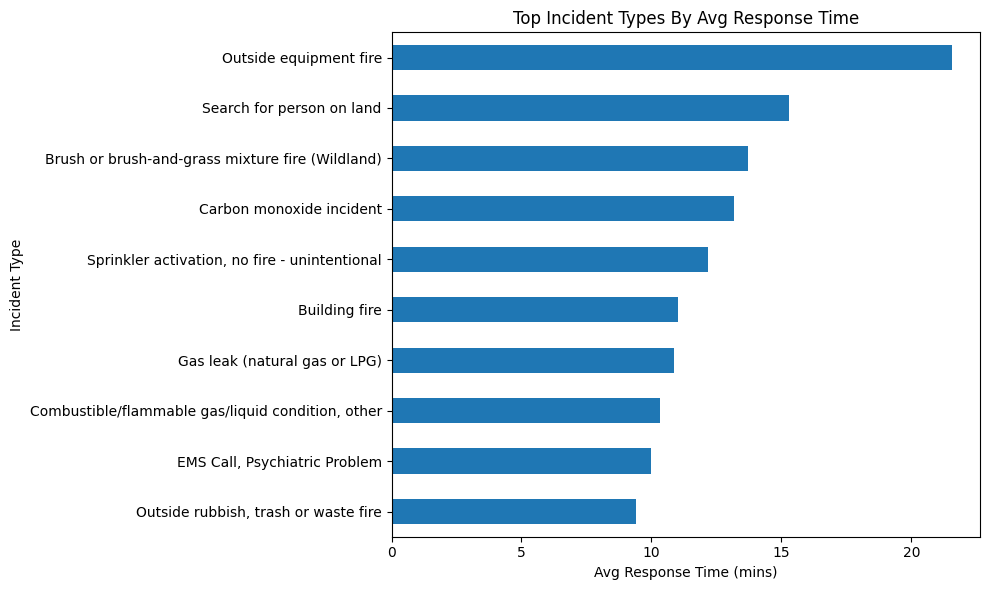

In [3]:
fire_example_df["dispatch_time"] = pd.to_datetime(fire_example_df["Apparatus Resource Dispatch Date Time (FD18.3)"], errors="coerce")
fire_example_df["arrive_time"] = pd.to_datetime(fire_example_df["Apparatus Resource Arrival Date Time (FD18.4)"], errors="coerce")

fire_example_df["resp_mins"] = (fire_example_df["arrive_time"] - fire_example_df["dispatch_time"]).dt.total_seconds() / 60

res = (
    fire_example_df.groupby("Basic Incident Type (FD1.21)")["resp_mins"]
    .mean()
    .sort_values(ascending=False)
    .dropna()
)

print("Top 5 Incident Types:")
print(res.head())

plt.figure(figsize=(10,6))
res.head(10).plot(kind="barh")
plt.xlabel("Avg Response Time (mins)")
plt.ylabel("Incident Type")
plt.title("Top Incident Types By Avg Response Time")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### Incidents By Week

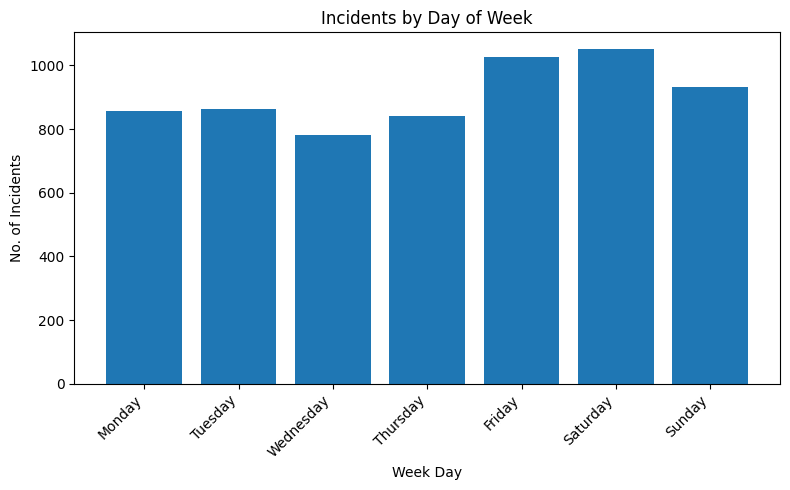

In [10]:
days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

day_stats = (fire_example_df["Basic Incident Day Name (FD1.3)"].value_counts().reindex(days_of_week, fill_value=0))

plt.figure(figsize=(8, 5))
plt.bar(day_stats.index, day_stats.values)
plt.xlabel("Week Day")
plt.ylabel("No. of Incidents")
plt.title("Incidents by Day of Week")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()